# Importing and Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
import itertools
from sklearn.metrics import confusion_matrix

In [3]:
data = pd.read_csv('creditcard.csv')
print(data.shape)
print(data.iloc[:,:10].describe())
print(data.iloc[:,10:20].describe())
print(data.iloc[:,20:].describe())


(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15  
std    1.380247e+00  1.332271e+0

In [4]:
print(data.info())
print(data.skew())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
print ("Fraud")
print (data.Amount[data.Class == 1].describe())
print ()
print ("Normal")
print (data.Amount[data.Class == 0].describe())

Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [6]:
data_corr = data.corr()
threshold = 0.25
corr_list = []
for i in range(1,31):
    for j in range(i+1,31): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index           
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))
cols=data.columns
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

V2 and Amount = -0.53
V7 and Amount = 0.40
V5 and Amount = -0.39
V20 and Amount = 0.34
V17 and Class = -0.33
V14 and Class = -0.30
V12 and Class = -0.26


In [7]:
'''n_cols = 2
n_rows = 15
cols=data.columns
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 8))
    for j in range(n_cols):
        sns.violinplot(y=cols[(i*n_cols+j+1)], data=data, ax=ax[j])
    plt.plot()'''

'n_cols = 2\nn_rows = 15\ncols=data.columns\nfor i in range(n_rows):\n    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 8))\n    for j in range(n_cols):\n        sns.violinplot(y=cols[(i*n_cols+j+1)], data=data, ax=ax[j])\n    plt.plot()'

In [8]:
train,test = train_test_split(data, shuffle=False)

In [9]:
X_train = train.loc[:, train.columns != 'Class']
y_train = train.loc[:, train.columns == 'Class']
train.Class.mean()*100

0.18632522646941785

In [10]:
X_test = test.loc[:, train.columns != 'Class']
y_test = test.loc[:, train.columns == 'Class']
test.Class.mean()*100

0.13201876351787872

In [11]:
fraud_i = train[train.Class == 1].index
genuine_i = train[train.Class == 0].index
rand_genuine_i = np.array(np.random.choice(genuine_i, int(len(fraud_i)*1.035), replace = False))
subset_d = train.iloc[np.concatenate([fraud_i,rand_genuine_i]),:]
X_sample = subset_d.loc[:, subset_d.columns != 'Class']
y_sample = subset_d.loc[:, subset_d.columns == 'Class']
X_sample.shape

(809, 30)

In [12]:
alg = XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5,min_child_weight=3, gamma=0.2, subsample=0.6, colsample_bytree=1.0,objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=0)
xgb_param = alg.get_xgb_params()
xgtrain = xgb.DMatrix(X_sample.values, label=y_sample.values)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=5,early_stopping_rounds=50)
alg.set_params(n_estimators=cvresult.shape[0])
alg.fit(X_sample, y_sample.values, eval_metric='auc')

/home/utsav/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/utsav/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0.2, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=3, missing=None,
       n_estimators=75, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=0, silent=True, subsample=0.6)

In [13]:
predictions = alg.predict(X_train)
(predictions == y_train.values.reshape(1,-1)).mean()

0.9675194869033965

Recall metric in the training dataset:  0.9698492462311558


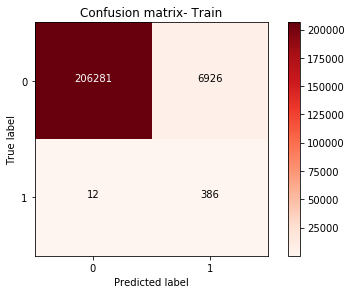

In [14]:
cnf_matrix = confusion_matrix(y_train,predictions)
np.set_printoptions(precision=2)
print("Recall metric in the training dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
class_names = [0,1]
plt.figure()
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion matrix- Train')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks, class_names)
cnf_m = cnf_matrix
#cnf_m = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
thresh = cnf_m.max() / 1.02
#print(thresh)
for i, j in itertools.product(range(cnf_m.shape[0]), range(cnf_m.shape[1])):
        plt.text(j, i, cnf_m[i, j],horizontalalignment="center",color="white" if cnf_m[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [15]:
pred_test = alg.predict(X_test)
(pred_test == y_test.values.reshape(1,-1)).mean()

0.9773882756102357

Recall metric in the testing dataset:  0.8617021276595744


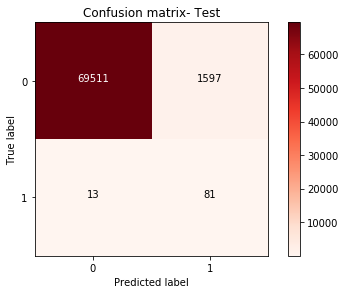

In [16]:
cnf_m = confusion_matrix(y_test,pred_test)
np.set_printoptions(precision=2)
print("Recall metric in the testing dataset: ", cnf_m[1,1]/(cnf_m[1,0]+cnf_m[1,1]))
class_names = [0,1]
plt.figure()
plt.imshow(cnf_m, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion matrix- Test')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks, class_names)
#cnf_m = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
thresh = cnf_m.max() / 1.02
#print(thresh)
for i, j in itertools.product(range(cnf_m.shape[0]), range(cnf_m.shape[1])):
        plt.text(j, i, cnf_m[i, j],horizontalalignment="center",color="white" if cnf_m[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

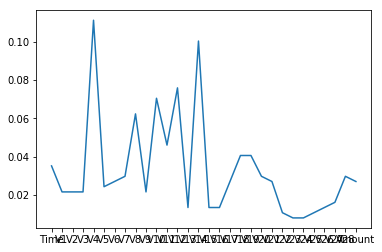

In [58]:
plt.plot(data.columns[:-1],alg.feature_importances_)